In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/youtube-sentiment-data/video_id_info.csv", on_bad_lines='skip')

/tmp/ipykernel_33/586718287.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/youtube-sentiment-data/video_id_info.csv", on_bad_lines='skip')


In [3]:
df.shape

(691400, 4)

In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [6]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [7]:
#drop null values
df.dropna(inplace=True)

In [8]:
df.shape

(691374, 4)

In [9]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2)Performing Sentiment Analysis

In [10]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks.

!pip install textblob

import sys     #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [11]:
from textblob import TextBlob

In [12]:
# taking sample data size of 1000 data records only.
# creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).

sample_df = df[0:1000]

In [13]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️")      #gives a normal text.

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [15]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment    #checking the sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [16]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity     #checking polarity of the sentiment. So, in the output we got a neutral sentence.
                                                                  # -1: Negative, 0: Neutral, 1:Positive

0.0

In [17]:
#running a for-loop to check the sentiments of all the data records in comment_text column.
polarity =[]    #creating a blank list to store all the sentiment values that we will get from running the loop.
for comment in df['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
      polarity.append(0)

In [18]:
len(polarity)

691374

In [19]:
df['polarity'] = polarity

In [20]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3)Wordcloud Analysis of Data

In [21]:
filter1 = df['polarity']==1
comments_positive = df[filter1]
df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [22]:
filter2 = df['polarity']==-1
comments_negative = df[filter2]
df[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [23]:
!pip install wordcloud
import sys
!{sys.executable} -m pip install wordcloud

In [24]:
from wordcloud import WordCloud, STOPWORDS
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [25]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [27]:
type(df['comment_text'])

pandas.core.series.Series

In [28]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [ ]:
total_comments_positive

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

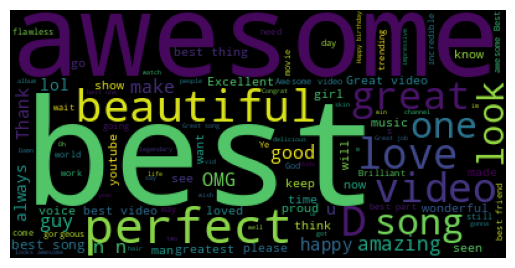

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the positive words are: awesome, best, love, great, perfect, beautiful, video, etc.***

In [ ]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
total_comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

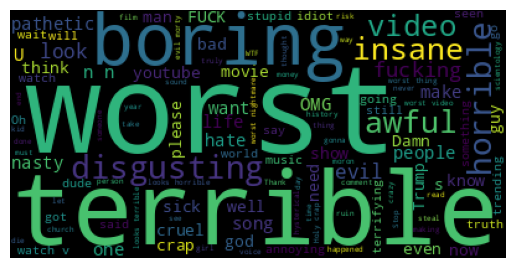

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the negative words are boring, worst, terrible, horrible, pathetic, cruel, insane, etc.***

## 4) Performing Emoji Analysis

In [35]:
!pip install emoji==2.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 5.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: emoji
    Found existing installation: emoji 2.12.1
    Uninstalling emoji-2.12.1:
      Successfully uninstalled emoji-2.12.1


In [36]:
import sys
!{sys.executable} -m pip install emoji==2.10.1

In [37]:
import emoji

In [38]:
emoji.__version__

'2.10.1'

In [39]:
comment = 'trending 😉'

In [40]:
#extracting emoji from the sentence
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [41]:
emo_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emo_list.append(char)

emo_list

['😉']

In [42]:
#iterating loop to extract all the emojis
all_emoji_list=[]
for comment in df['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)

#Displaying only first 10 emojis. We can also display more emojis by not defining the size.
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

**Now we will check the frequency of each and every emoji.**

In [43]:
from collections import Counter

In [44]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [45]:
# checking frequency of the first emoji only
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [46]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [47]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [48]:
# checking frequency of the second emoji only
Counter(all_emoji_list).most_common(10)[1]

('😍', 33453)

In [49]:
#displaying only the emoji list containing all the emojis
emojis = [Counter(all_emoji_list).most_common(20)[i][0] for i in range(20)]
emojis

['😂',
 '😍',
 '❤',
 '🔥',
 '😭',
 '👏',
 '😘',
 '👍',
 '💖',
 '💕',
 '♥',
 '😊',
 '🏻',
 '💜',
 '😬',
 '👌',
 '💙',
 '😢',
 '🏼',
 '🤣']

In [50]:
freqs = [Counter(all_emoji_list).most_common(20)[i][1] for i in range(20)]
freqs

[36987,
 33453,
 31119,
 8694,
 8398,
 5719,
 5545,
 5476,
 5359,
 5147,
 4909,
 3596,
 3438,
 3429,
 3381,
 3112,
 2831,
 2672,
 2549,
 2279]

In [51]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [52]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [53]:
trace = go.Bar(x=emojis, y=freqs, text=freqs,textposition='auto') 

# Create the figure
fig = go.Figure(data=[trace])

# Update layout with axis labels and x-tick label size
fig.update_layout(
    title='Emoji Frequency',
    xaxis_title='Emojis',
    yaxis_title='Frequency',
    xaxis=dict(
        tickfont=dict(size=20),
        showgrid=False
    ),
    yaxis=dict(
        showgrid=False
)
)

# Show the figure
fig.show()

***Hence, maximum users are happy with the particular YouTube content.***

## Analysing entire data on YouTube

In [54]:
import os

In [55]:
files = os.listdir('/kaggle/input/youtube-dataset/YT_additional_data')
files

['GBvideos.csv',
 'MXvideos.csv',
 'KRvideos.csv',
 'MX_category_id.json',
 'GB_category_id.json',
 'US_category_id.json',
 'README.md',
 'IN_category_id.json',
 'DEvideos.csv',
 'KR_category_id.json',
 'RU_category_id.json',
 'FRvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'RUvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'JP_category_id.json',
 'JPvideos.csv',
 'FR_category_id.json',
 'CAvideos.csv']

In [56]:
files_csv = [file for file in files if '.csv' in file]
files_csv

['GBvideos.csv',
 'MXvideos.csv',
 'KRvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'RUvideos.csv',
 'JPvideos.csv',
 'CAvideos.csv']

In [57]:
#while colllecting the data if you encounter any kind of warning its always a good practice to import  warning modules.

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [58]:
#storing all the csv files in one dataframe

full_df = pd.DataFrame()
path = '/kaggle/input/youtube-dataset/YT_additional_data'

for file in files_csv: 
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [59]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,ð¨ NEW MERCH! http://amzn.to/annoyingorange ...
375938,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,âº Retrouvez vos programmes prÃ©fÃ©rÃ©s : htt...
375939,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
375940,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isnât talking so tough now. An...


In [60]:
full_df.shape

(375942, 16)

In [61]:
# Checking for duplicate records of data
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [62]:
full_df[full_df.duplicated()].shape

(36417, 16)

***So, we have 36417 records of duplicated data.***

In [63]:
#dropping the duplicate values
full_df = full_df.drop_duplicates()

In [64]:
full_df.shape

(339525, 16)

### Which category has the maximum likes?

In [65]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [66]:
full_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               17977
dtype: int64

In [67]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Which content category has the maximum likes?

In [68]:
full_df['category_id'].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43, 44,
       30])

In [69]:
# Let's read any json file from the folder

json_df = pd.read_json('/kaggle/input/youtube-dataset/YT_additional_data/US_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [70]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [71]:
#Extract channel ID and title in a dictionary
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [72]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [73]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [74]:
# create new column of category name
full_df['category_name'] = full_df['category_id'].map(cat_dict) 
full_df['category_name']

0           Howto & Style
1           Entertainment
2                   Music
3                  Sports
4         News & Politics
               ...       
375937      Entertainment
375938      Entertainment
375939             Gaming
375940    News & Politics
375941      Entertainment
Name: category_name, Length: 339525, dtype: object

In [75]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics


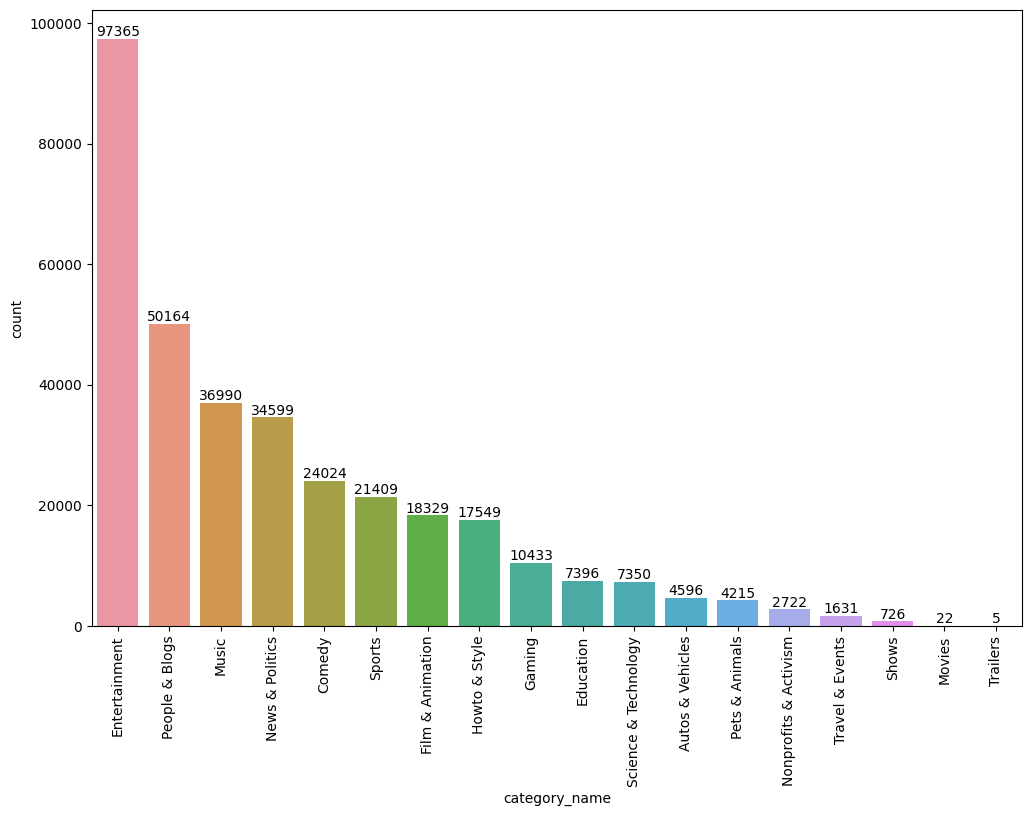

In [76]:
# Step 1: Calculate counts and sort them
category_counts = full_df['category_name'].value_counts().sort_values(ascending=False)

# Step 2: Create a new DataFrame with sorted categories
sorted_df = pd.DataFrame({'category_name': category_counts.index, 'count': category_counts.values})

plt.figure(figsize=(12,8))
# ax=sns.countplot(x='category_name', data=full_df)
ax = sns.barplot(x='category_name', y='count', data=sorted_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation='vertical')
plt.show()

## Find whether the audience is engaged or not.

In [81]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics


In [80]:
engagement=(full_df['likes']/full_df['views'])*100
engagement

0         0.770723
1         2.425989
2         4.589075
3         0.693421
4         0.305655
            ...   
375937    2.108199
375938    0.445137
375939    3.349079
375940    1.835539
375941    0.279350
Length: 339525, dtype: float64

In [82]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [84]:
full_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,0.770723,0.141837,0.131206
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,2.425989,0.217723,0.261666
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589075,0.253051,0.733639
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,0.693421,0.043114,0.132936
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,0.305655,0.020377,0.305655
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...,Entertainment,4.456300,0.120987,0.197248
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874545,0.062887,0.253752
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,People & Blogs,4.922604,0.064336,0.053599
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,10,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"âGolden Slumbersâ, originally by The Beatl...",Music,1.400054,0.095149,0.136575
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...",Music,1.990684,0.157247,0.120153


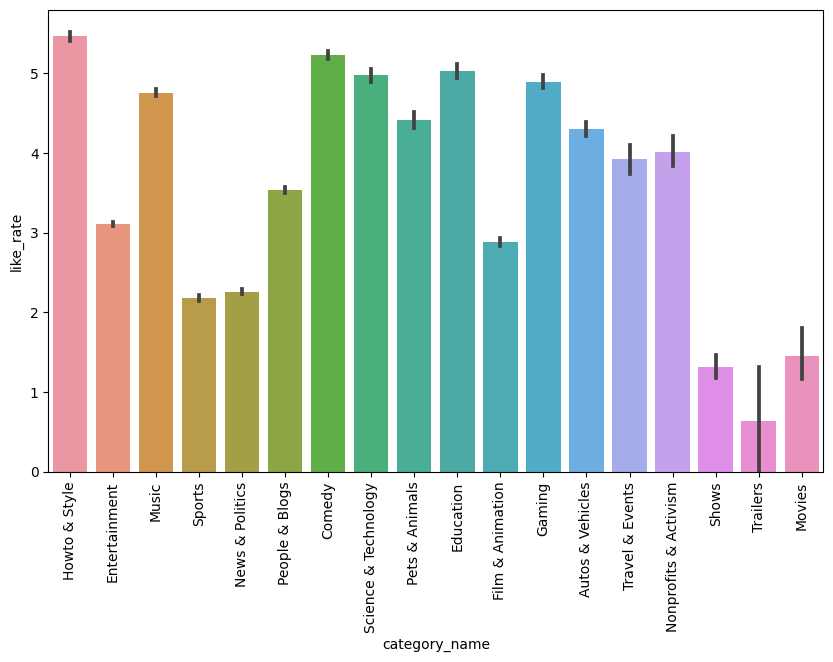

In [87]:
#plotting like rate against category name
plt.figure(figsize=(10,6))
sns.barplot(x='category_name', y='like_rate', data= full_df)
plt.xticks(rotation='vertical')
plt.show()